In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logistic_regression

# Logistic regression application to 2D case

The data is generated through 2D normal distribution around two centers.
Restart and run all cells everytime when parameters are updated.

In [2]:
def generating2dData(N,distance):
    xList = []
    category = []
    for i in range(N):
        x = np.random.normal(0,distance/2.5,size=None)
        y = np.random.normal(0,distance/2.5,size=None)
        xList.append([x,y])
        category.append([0])

    for i in range(N):
        x = np.random.normal(distance,distance/2.5,size=None)
        y = np.random.normal(distance,distance/2.5,size=None)
        xList.append([x,y])
        category.append([1])
    return xList, category

We choose N=250 (500 dots in total) and the distance between center to be 10$\sqrt{2}$.

In [3]:
N, d = 250, 10
xList, cat = generating2dData(N, d)

The data is plotted in red and blue colors.

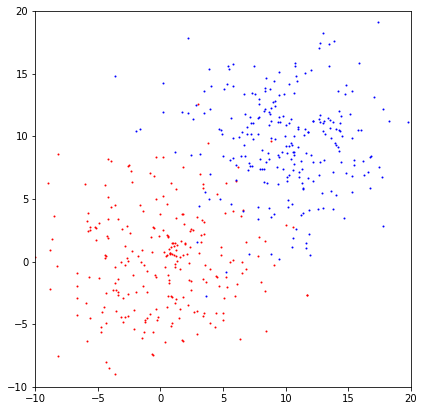

In [4]:
def plotData(xList):
    xMat = np.array(xList)
    plt.figure(figsize=(6,6))
    plt.plot(xMat[:N,0],xMat[:N,1],'ro',markersize=1)
    plt.plot(xMat[N:,0],xMat[N:,1],'bo',markersize=1)
    plt.xlim([-d,2*d])
    plt.ylim([-d,2*d])
    plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08)
    plt.show()
    return
plotData(xList)

We then apply the LR package with iteration time Ncyc=10000 and step length dl=0.1.

In [5]:
cycleMax, stepSize = 10000, 0.1
LRsolution = logistic_regression.LogisticRegression(xList, cat, cycleMax, stepSize)
theta_solu = LRsolution.run()

The error rate is calculated. The error rate depends on the iteration parameter setting and data itself.

In [6]:
def calErrorRate(xList,Category,theta):
    count = 0
    for i in range(2*N):
        sign = np.sign(theta[0] * xList[i][0] + theta[1] * xList[i][1] + theta[2])
        sign = int(0.5*sign+0.5)
        # print(sign, Category[i])
        if sign != Category[i][0]:
            count+=1
    return count/(2*N)

In [7]:
errorRate  = np.round(calErrorRate(xList,cat,theta_solu)*100,3)
print('The error rate is:',errorRate,'%')

The error rate is: 4.6 %


We also plot the solved line for visualization.

In [8]:
def plotResult(xList,theta):
    xMat = np.array(xList)
    xaxis = np.linspace(-d,2*d,1000)
    yaxis = -1/theta[1] * (theta[0] * xaxis + theta[2])
    y0 = d - xaxis
    plt.figure(figsize=(6,6))
    plt.plot(xMat[:N,0],xMat[:N,1],'ro',markersize=1)
    plt.plot(xMat[N:,0],xMat[N:,1],'bo',markersize=1)
    plt.plot(xaxis,yaxis,'g',linewidth = 1,markersize=0.5,label='solution line, error rate ='+str(errorRate)+'%')
    plt.plot(xaxis,y0,'grey',linewidth = 0.3,markersize=0.3,label='intuitive line')
    plt.xlim([-d,2*d])
    plt.ylim([-d,2*d])
    plt.legend()
    plt.title('N='+str(2*N)+', cycleMax='+str(cycleMax)+', stepSize='+str(stepSize))
    plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08)
    plt.show()
    return

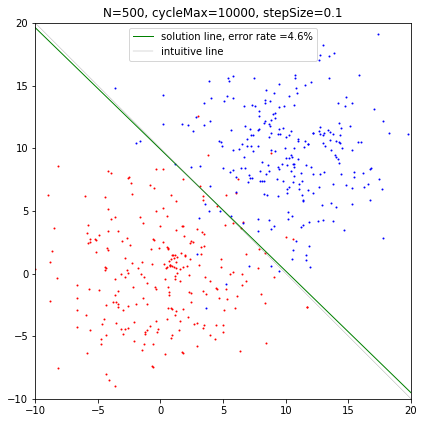

In [9]:
plotResult(xList, theta_solu)